# K-Means

In [4]:
# Packages
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import SpectralClustering, DBSCAN, KMeans
from sklearn.datasets import make_blobs

In [5]:
data = pd.read_csv("data.csv", index_col=0)
data.head(n=5)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,label
0,-18.542814,-18.668093,-18.668093,-18.668093,-18.668093,-18.657626,-0.690188,5.438274,1.227493,4.616696,...,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.290593,american
1,-17.233382,-17.358661,-17.358661,-17.358661,-17.358661,-16.581489,1.511105,5.112031,1.283484,4.130621,...,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.290593,american
2,-18.296087,-18.421367,-18.421367,-18.421367,-18.421367,-18.421367,-16.046306,1.353363,3.334118,2.519160,...,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.290593,american
3,-18.343959,-18.469239,-18.469239,-18.469239,-18.469239,-18.469216,-3.172947,2.963999,3.899948,2.573710,...,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.290593,american
4,-16.493662,-16.618942,-16.618942,-16.618942,-16.618942,-16.618942,-15.462523,1.110224,2.803240,3.514306,...,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.290593,american


In [6]:
data.shape

(6752, 500)

In [20]:
X = data.iloc[:, :-1]

In [21]:
#Find optimum number of cluster
sse = [] #SUM OF SQUARED ERROR
for k in range(1,11):
	km = KMeans(n_clusters=k, random_state=2, n_init='auto')
	km.fit(X)
	sse.append(km.inertia_)

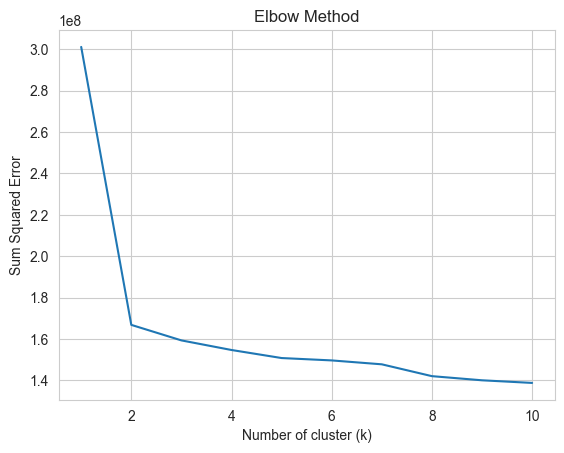

In [22]:
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)

g.set(xlabel ="Number of cluster (k)", 
	ylabel = "Sum Squared Error", 
	title ='Elbow Method')

plt.show()

In [23]:
kmeans = KMeans(n_clusters = 2, random_state = 99)
kmeans.fit(X)

/Users/alexavndra/miniforge3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=99)

In [24]:
kmeans.cluster_centers_

array([[-3.66448915e+00, -3.69887859e+00, -3.70930145e+00,
        -3.69844704e+00, -3.66533407e+00, -3.58926305e+00,
        -3.47323330e+00, -3.31100677e+00, -2.93085472e+00,
        -2.42362780e+00, -1.63568738e+00, -4.94576936e-01,
         7.87065976e-01,  1.93375988e+00,  3.13012511e+00,
         2.41802873e+00,  1.73640633e+00,  1.65817949e+00,
         1.56050705e+00,  1.45905424e+00,  1.37327966e+00,
         1.52608875e+00,  1.50126226e+00,  1.42912378e+00,
         1.22182862e+00,  1.09878677e+00,  8.76441086e-01,
         4.39314904e-01, -1.64799337e-02, -6.22681628e-01,
        -1.12775871e+00, -1.87617240e+00, -2.58407040e+00,
        -3.19222232e+00, -3.87483226e+00, -4.71284747e+00,
        -5.38423232e+00, -7.29750523e+00, -4.98944334e+00,
        -3.41684938e+00, -3.47169051e+00, -3.44385129e+00,
        -3.36281441e+00, -3.27625373e+00, -3.20101894e+00,
        -3.14789124e+00, -2.99617371e+00, -2.62647107e+00,
        -1.71300960e+00,  1.23968399e-01,  2.77518717e+0

In [25]:
k = 2

clusters = {}
np.random.seed(23)

for idx in range(k):
	center = 2*(2*np.random.random((X.shape[1],))-1)
	points = []
	cluster = {
		'center' : center,
		'points' : []
	}
	
	clusters[idx] = cluster
	
clusters

{0: {'center': array([ 0.06919154,  1.78785042,  1.06183904, -0.87041662, -1.11581855,
          0.74488834, -1.33144319, -0.43023013,  0.47220939, -0.35227962,
         -1.99014048,  1.53612873,  1.53979015, -0.79836124,  0.35832746,
          1.91370766,  1.38037529, -1.73969824, -0.82102214, -0.84826224,
          1.28986536,  0.50473215, -1.55808914, -1.99788476,  1.76866493,
         -1.43399697, -0.3136139 , -0.61404224,  1.47914034, -0.28559275,
          1.31500594,  0.87140735, -1.52309322,  0.38553669, -1.48097481,
         -1.68986363,  1.32482102, -0.14245754, -1.35195008,  0.19190117,
          0.35394329,  1.09445268,  0.62338183,  0.23082704, -1.28701093,
         -1.03766588,  0.02421853, -0.4130172 , -0.06777926,  1.82295936,
          1.60640877,  0.02303729,  1.28280594,  1.3108637 , -1.07266661,
         -1.68377805, -0.13694829,  1.51590323, -1.40998777, -1.07499478,
          1.67178322, -1.48374589,  1.66563089, -1.0608098 ,  0.46394707,
          1.80635104, -0.